In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
data = pd.read_csv('Student Mental health.csv')
data.head()

Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes                        No   
2                     Yes                  Yes                       Yes   
3                     Yes                   No                        No   
4                      No                   No                        No   

  Did you seek any specialist for a treatment?  
0                                           No  
1                                           No  
2                                           No  
3                                           No  
4                                           No

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [4]:
data.describe()

Age
count  100.00000
mean    20.53000
std      2.49628
min     18.00000
25%     18.00000
50%     19.00000
75%     23.00000
max     24.00000

In [5]:
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

Timestamp  Gender   Age       Course    Year         CGPA  \
0  8/7/2020 12:02  Female  18.0  Engineering  year 1  3.00 - 3.49   

  Marital_Status Depression Anxiety Panic_Attack Treatment  
0             No        Yes      No          Yes        No

In [6]:
data['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'} , inplace = True)
len(data['Course'].unique())

37

In [7]:
student_mental_health_data = data.copy() 

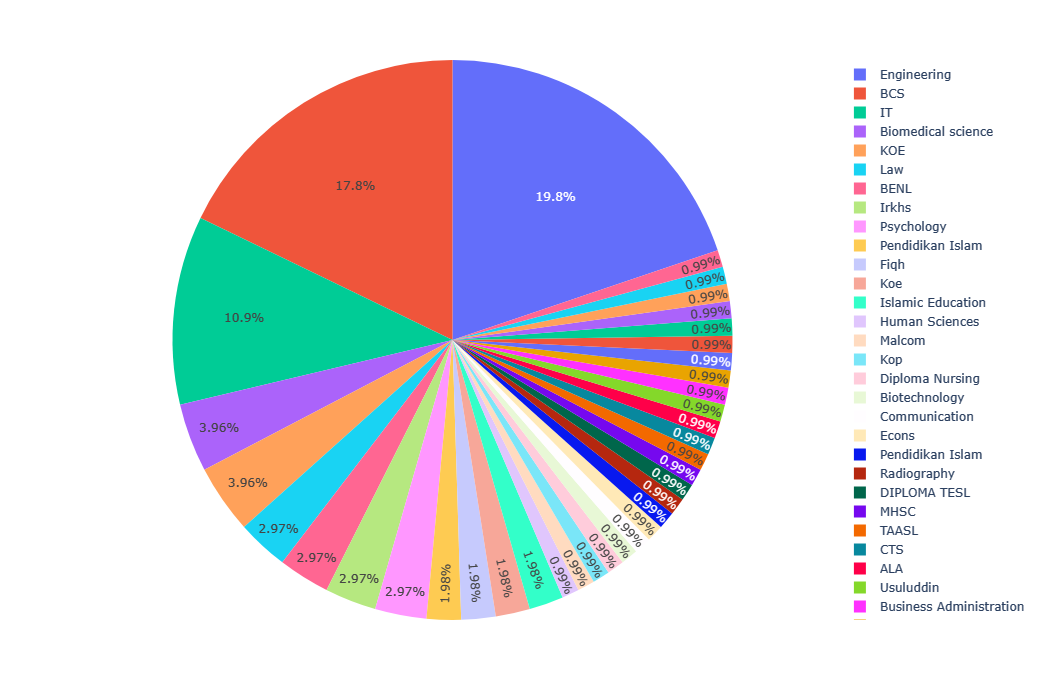

In [8]:
#Course Distrbution
stu_course = student_mental_health_data['Course'].value_counts().reset_index()
stu_course.columns = ['Course', 'value_counts']
px.pie(stu_course,names='Course',values='value_counts', width = 600, height = 700)

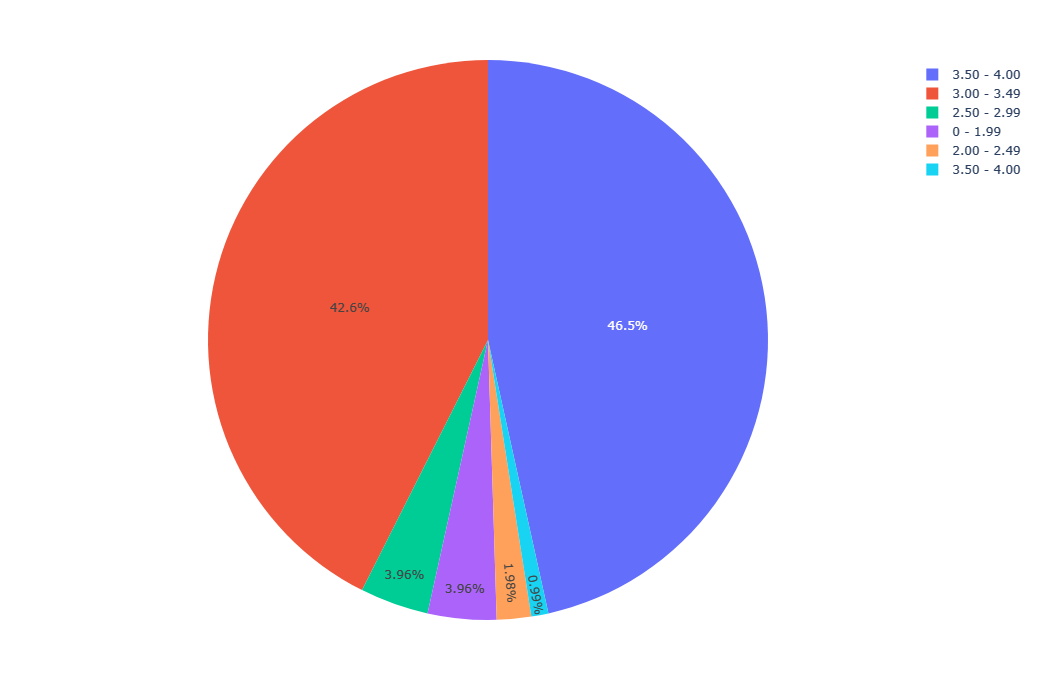

In [9]:
#CGPA 
stu_course = student_mental_health_data['CGPA'].value_counts().reset_index()
stu_course.columns = ['CGPA', 'value_counts']
px.pie(stu_course,names='CGPA',values='value_counts', width = 600, height = 700)

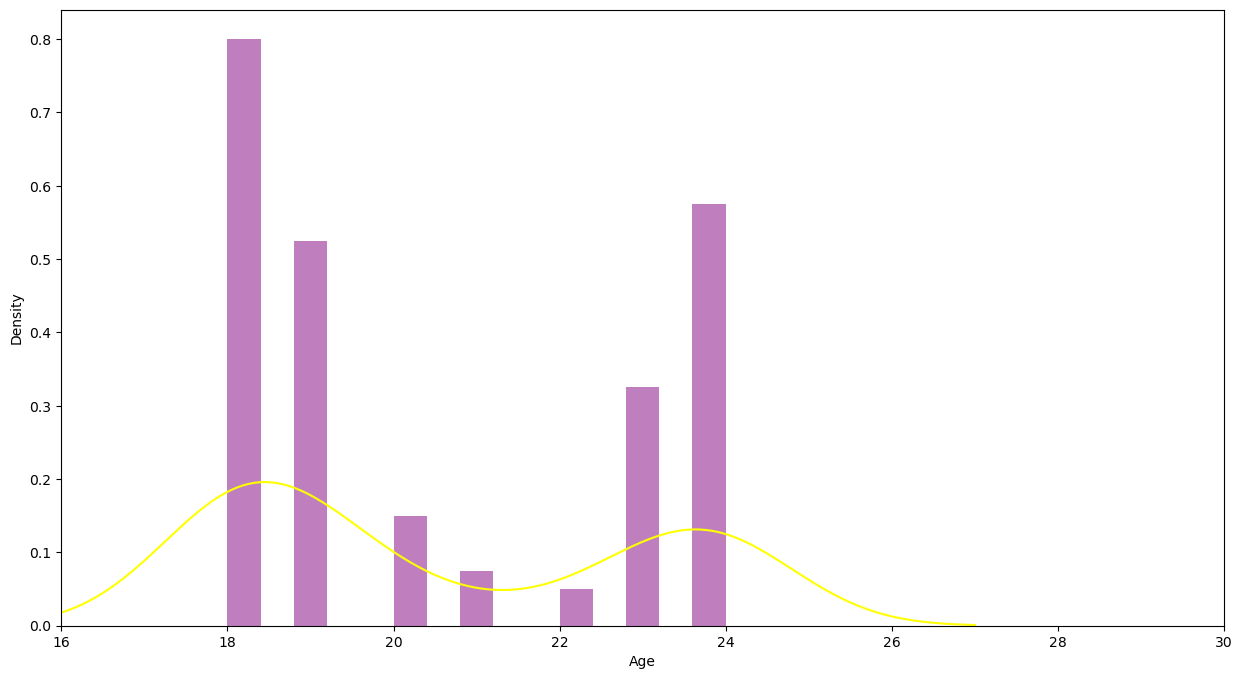

In [10]:
#age distribution
plt.figure(figsize=(15,8))
ax = student_mental_health_data["Age"].hist(bins=15, density=True, stacked=True, color='purple', alpha=0.5)
student_mental_health_data["Age"].plot(kind='density', color='yellow')
ax.set(xlabel='Age')
plt.xlim(16,30)
plt.show()

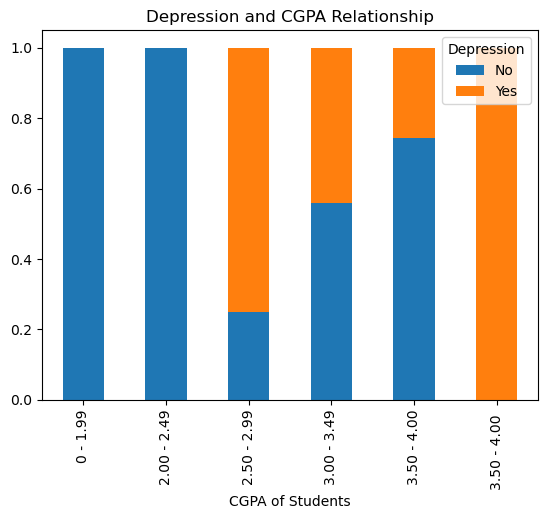

In [11]:
#distribution of depression among students by cgpa
table=pd.crosstab(student_mental_health_data['CGPA'],student_mental_health_data['Depression'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Depression and CGPA Relationship')
plt.xlabel('CGPA of Students')
plt.savefig('depression_vs_cgpa')
plt.show()

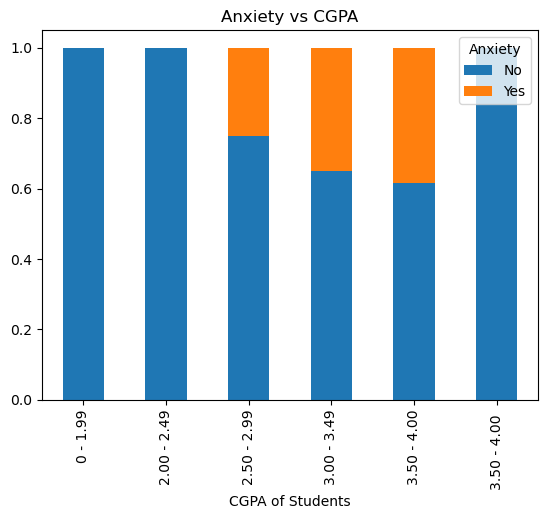

In [12]:
table=pd.crosstab(student_mental_health_data['CGPA'],student_mental_health_data['Anxiety'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Anxiety vs CGPA')
plt.xlabel('CGPA of Students')
plt.show()

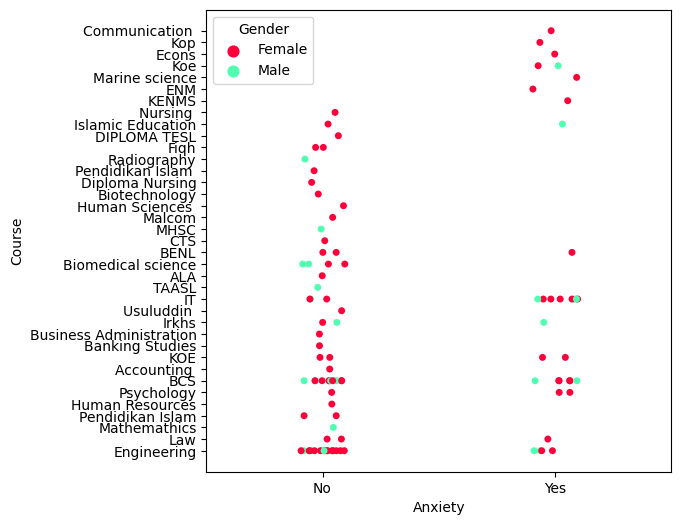

In [13]:
plt.figure(figsize=(6, 6))
sns.stripplot(x = 'Anxiety', y = 'Course', hue = 'Gender', data = data, palette = ['#FF003B', '#50FFB1'])
plt.show()

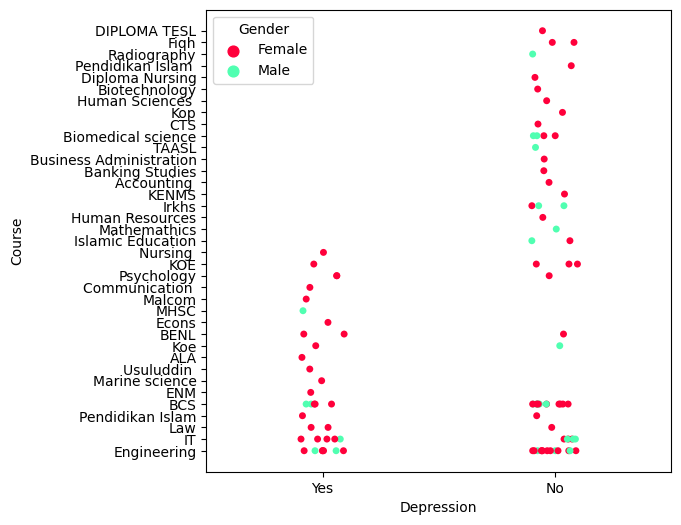

In [14]:
plt.figure(figsize=(6, 6))
sns.stripplot(x = 'Depression', y = 'Course', hue = 'Gender', data = data, palette = ['#FF003B', '#50FFB1'])
plt.show()

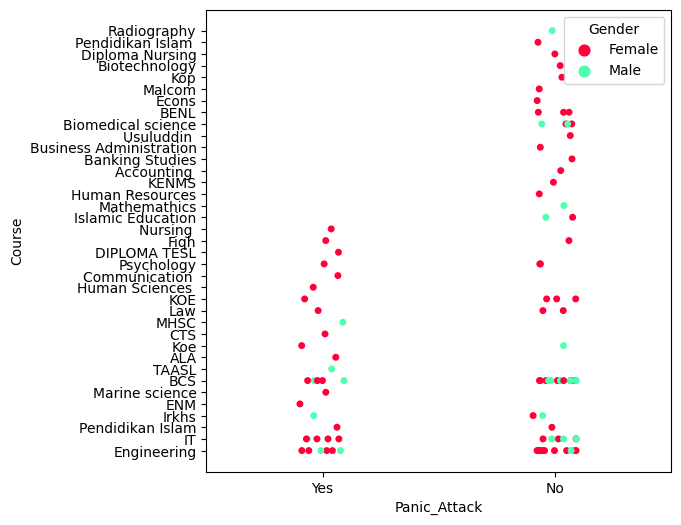

In [15]:
plt.figure(figsize=(6, 6))
sns.stripplot(x = 'Panic_Attack', y = 'Course', hue = 'Gender', data = data, palette = ['#FF003B', '#50FFB1'])
plt.show()

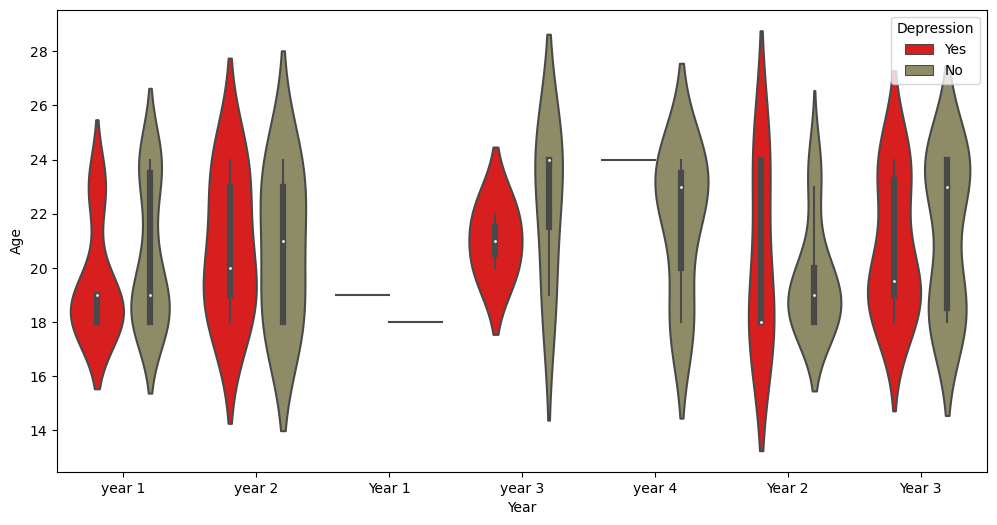

In [21]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Depression', palette = ['#F60000', '#949060'])
plt.show()

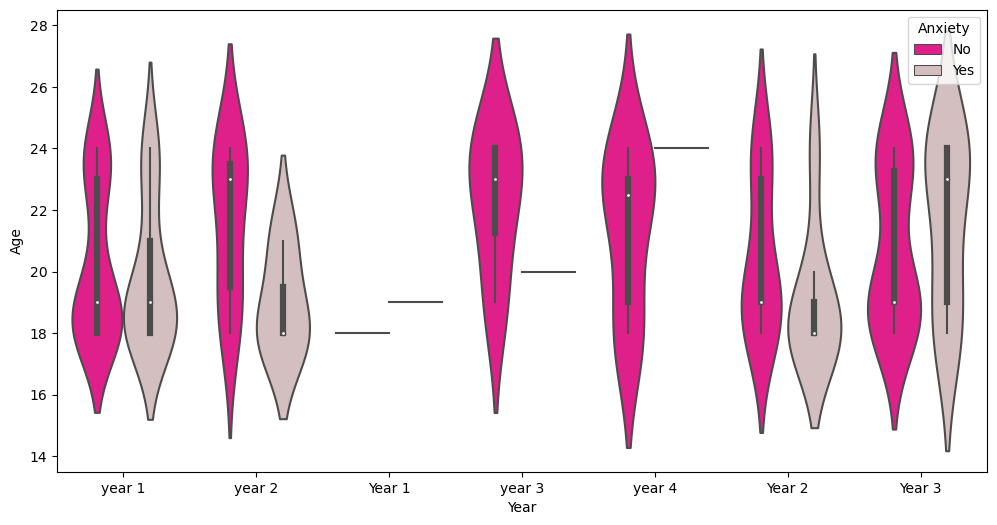

In [24]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Anxiety', palette = ['#FF008D', '#D7BCBB'])
plt.show()

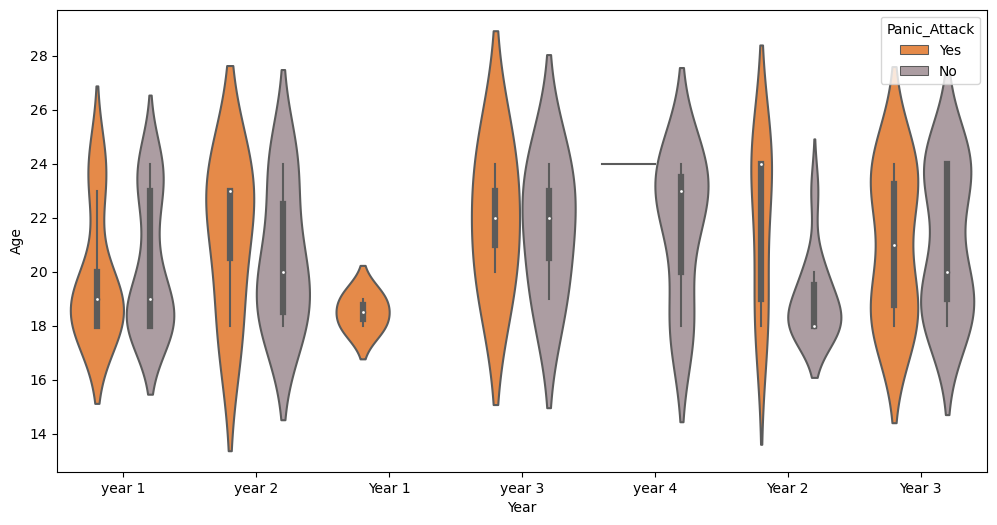

In [25]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'Year', y = 'Age', data = data,  hue = 'Panic_Attack', palette = ['#FF862F', '#AF9AA1'])
plt.show()